# Домашнее задание №15

#### Подключение библиотек

In [17]:
from utils import *

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Номер 1

In [3]:
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 5,
    x1_std = 3,
    x2_mean = 9,
    x2_std = 2,
    x3_mean = -5,
    x3_std = 1,
    corr_12 = 0,
    corr_13 = 0,
    corr_23 = 0.8,
    
    
    # Зададим параметры распределения ошибки
    e_mean = 0,
    e_std = 7,

    # Укажем размер выборки
    N = 1000,

    # Зададим действительные параметры модели
    beta0 = 3,
    beta1 = 10.3,
    beta2 = -7.2,
    beta3 = 3.9
)


In [4]:
coefs_list = dict(
    b1 = [],
    b1_low = [],
    b1_high = [],

    b2 = [],
    b2_low = [],
    b2_high = [],

    b3 = [],
    b3_low = [],
    b3_high = [],
    
)

In [6]:
for i in range(10000):
    data = gen_data(y_type='multivariate', params=dist_params)
    _, model = train_model(data, target='y', feature_names=['x1', 'x2', 'x3'])
    intervals = model.conf_int()

    coefs_list['b1'].append(model.params[1])
    coefs_list['b1_low'].append(intervals.iloc[1][0])
    coefs_list['b1_high'].append(intervals.iloc[1][1])


    coefs_list['b2'].append(model.params[2])
    coefs_list['b2_low'].append(intervals.iloc[2][0])
    coefs_list['b2_high'].append(intervals.iloc[2][1])

    coefs_list['b3'].append(model.params[3])
    coefs_list['b3_low'].append(intervals.iloc[3][0])
    coefs_list['b3_high'].append(intervals.iloc[3][1])

#### Задача 1.1

In [7]:
cnt = 0
for i in range(10000):
    if coefs_list['b1'][i] <= coefs_list['b1_high'][i] and coefs_list['b1'][i] >= coefs_list['b1_low'][i]:
        cnt += 1

print(f"Коэффициент beta1 попадает в свой доверительный интервал в {cnt/100}% итераций")

Коэффициент beta1 попадает в свой доверительный интервал в 100.0% итераций


#### Задача 1.2

In [8]:
cnt = 0
for i in range(10000):
    if coefs_list['b2'][i] <= coefs_list['b2_high'][i] and coefs_list['b2'][i] >= coefs_list['b2_low'][i]:
        cnt += 1

print(f"Коэффициент beta2 попадает в свой доверительный интервал в {cnt/100}% итераций")

cnt = 0
for i in range(10000):
    if coefs_list['b2'][i] <= coefs_list['b2_high'][i] and coefs_list['b2'][i] >= coefs_list['b2_low'][i]:
        cnt += 1

print(f"Коэффициент beta2 попадает в свой доверительный интервал в {cnt/100}% итераций")

Коэффициент beta2 попадает в свой доверительный интервал в 100.0% итераций
Коэффициент beta2 попадает в свой доверительный интервал в 100.0% итераций


## Номер 2

In [12]:
import pandas as pd

Получим датасет

In [10]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [23]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
target = df['HeartDiseaseorAttack']
X = df.drop('HeartDiseaseorAttack', axis=1)


 ================================================== TRAIN RESULTS ================================================== 

ROC AUC score: 0.841

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84    229787
         1.0       0.24      0.80      0.37     23893

    accuracy                           0.74    253680
   macro avg       0.61      0.77      0.60    253680
weighted avg       0.90      0.74      0.79    253680



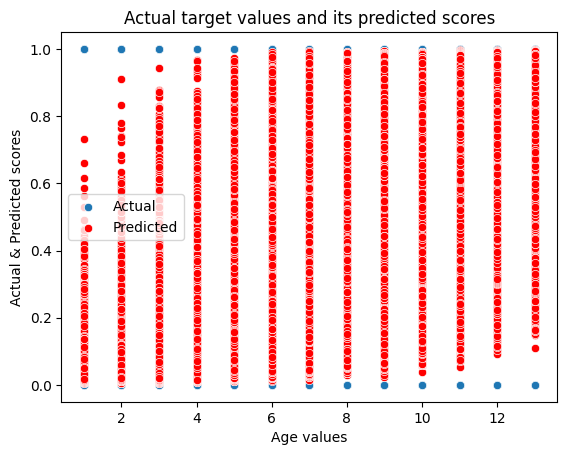

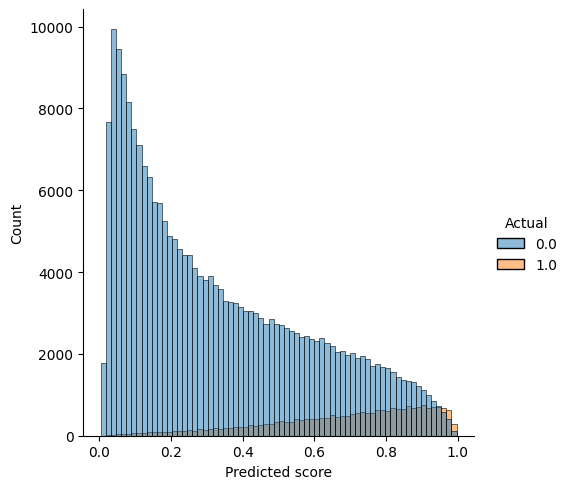

Predicted,0.000000,1.000000
Actual,,
0.000000,169261,60526
1.000000,4897,18996


In [22]:
dt_logit, model_logit = train_binary(
    df, target='HeartDiseaseorAttack',
    feature_names=X.columns,
    plot_feature='Age',
    model_type='logit', pkg='sklearn',
    class_weight="balanced")

#### Вывод по результатам:

**1. Precision и Recall:**
- Precision измеряет, насколько точными были предсказания положительного класса. В нашем случае точность того, что мы предсказали человека с заболеванием составляет 0.24, что довольно мало и означает что довольно много здоровых людей были отнесены моделью к тем, у кого есть заболевание. 
- Recall измеряет, какую часть истинно положительных примеров модель смогла выявить. Данный показатель для положительного класса составляет 0.8, что является хорошим результатом и означает, что примерно 80% из всех людей с заболеванием сердца наша модель смогла обнаружить. 

**2. F-score:**
- F1-score объединяет точность и полноту в одну метрику. Это гармоническое среднее между точностью и полнотой. У полученой модели эта метрика для положительного класса равна 0.37, что довольно низко, но это объясняется низким значением Precision. Однако для нашей задачи гораздо важнее найти человека с заболеванием, т.е. максимизировать Recall.

**3. Roc-auc:**
- ROC-AUC является метрикой, используемой для оценки качества бинарной классификации. В нашем случае эта метрика принимает значение 0.841, что довольно хорошо и указывает указывает на хорошую разделимость классов нашей моделью.

**Скольким людям из 100 наша модель выдаст верный диагноз:**

$100*accuracy = 100*0.74 = 74$

**Скольким людям из 100 наша модель выдаст неверный диагноз:**

$100-74 = 26$

**Сколько людей из 100 наша модель не посчитала больным и ошиблась:**

$100*FN = 100*\frac{4897}{253680} \approx 2$

### Итог

Модель получилась довольно хорошей для поставленой задачи, ведь нам важнее найти человека с заболеванием, чтобы начать лечение за ранее, чем мы отнесем его к здоровым, что может привести потом к плохим последствиям. Поэтому в этой проблеме нужно получить высокий показатель Recall, что у нас и получилось. Поднятие уровня Precision тоже важно, ведь всех подряд относить к больным тоже не вариант. Но удалось получить только значение 0.24, что уже неплохо, но и не идеально.